In [6]:
library(dplyr)
library(corrplot)
library(car)
library(ggplot2)
library(scales)
library(xtable)
library(rsm)

setwd('C:\\Users\\David.solano\\OneDrive - Ipsos\\David\\Modelos Lineales')

Warning message:
"package 'rsm' was built under R version 4.0.5"


### Contexto

El concreto es un material versátil usado en la construcción de diversas obras. Las características ideales del concreto varían en función del tipo de obra que se desee realizar, pero una de las más relevantes es la resistencia del material ya que está relacionada directamente con la vida útil que tendrá la obra. No obstante lo anterior, medir la resistencia del concreto es una tarea compleja ya que no depende únicamente de la relación entre agua y cemento que se emplee para su elaboración (Yeh, 1998).\\

En este trabajo se modela el comportamiento de la resistencia del concreto en función de los ingredientes y la edad esto con el fin de comprender la relación existente y poder realizar prediciónes futuras sobre la resistencia de una forma más precisa que la llevada a cabo hasta el momento.\\

Entre los factores que afectan la resistencia a la compresión del concreto  se encuentran los siguientes peso del cemento, escoria de alto horno, cenizas volantes, agua, aditivo superplastificante, agregados gruesos, agregados finos, todos medidos en kilogramos en una mezcla de un $m^3$, la edad de la mezcla, medida en días.

### Lectura Datos y Descripción Variables

In [12]:
data = read.csv2('datasets_31874_41246_Concrete_Data_Yeh.csv',sep=',',dec='.')
data[,-ncol(data)] = (scale(data[,-ncol(data)])) %>% as.data.frame()
head(data)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2.4767117,-0.8564718,-0.8467326,-0.9163193,-0.6201471,0.86273513,-1.2170788,-0.2795973,79.99
2,2.4767117,-0.8564718,-0.8467326,-0.9163193,-0.6201471,1.05565137,-1.2170788,-0.2795973,61.89
3,0.4911867,0.7951402,-0.8467326,2.1744049,-1.0386383,-0.52626175,-2.2398290,3.5513405,40.27
4,0.4911867,0.7951402,-0.8467326,2.1744049,-1.0386383,-0.52626175,-2.2398290,5.0552210,41.05
5,-0.7900750,0.6780786,-0.8467326,0.4885554,-1.0386383,0.07049247,0.6475694,4.9760694,44.30
6,-0.1451382,0.4648178,-0.8467326,2.1744049,-1.0386383,-0.52626175,-1.2919142,0.7018826,47.03


* Cemento (componente 1) - cuantitativo - kg en una mezcla m3 - Variable de Entrada
* Escoria de alto horno (componente 2) - cuantitativa - kg en una mezcla m3 - Variable Entrada. (Refuerzo )
* Cenizas volantes variables (componente 3) - cuantitativas - kg en una mezcla m3 - Variable de Entrada 
* Agua variable de entrada (componente 4) - cuantitativas - kg en una mezcla m3 - Variable de Entrada
* Superplastificante variable de entrada (componente 5) - cuantitativas - kg en una mezcla m3 - Variable de Entrada
* Agregado grueso (componente 6) - cuantitativo - kg en una mezcla m3 - Variable de Entrada 
* Agregado fino variable de entrada (componente 7) - cuantitativo - kg en una mezcla m3 - Variable de Entrada 
* Edad variable de entrada - cuantitativo - Día (1 ~ 365) - Entrada de Variable
* Resistencia a la compresión del  concreto - cuantitativa - MPa - Salida de  Variable (medida en megapascales)

### Análisis Descriptivo
#### Correlaciones 

Se observan correlaciones fuertes entre las variables agua y superplastificante, correlaciones moderadas entre las variables cenizas volantes y cemento, agregados finos y agua, superplastificante y cenizas volantes y agregado grueso y escoria de alto horno. Estas correlaciones podrían indicar la presencia de multicolinealidad en las variables regresoras, no obstante, esto es probado ex-post a la estimación de los modelos.

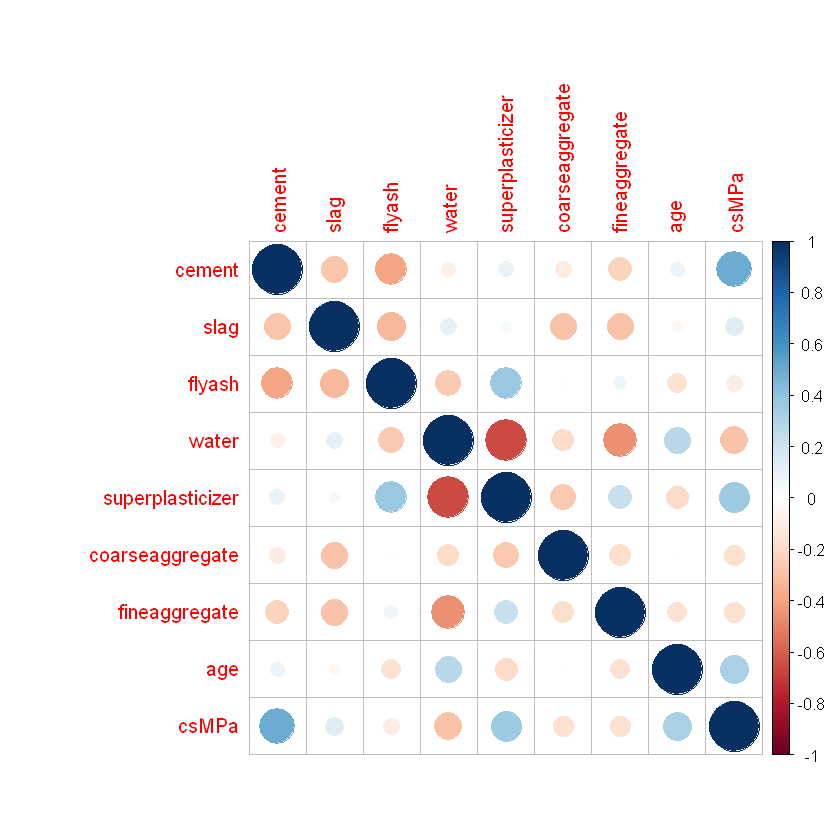

In [8]:
COR = cor(data)
corrplot(COR)

#### Diagrama de Puntos

A continuación se presentan los diagramas de dispersión de la variable respuesta con respecto a cada una  de las variables independientes. Se puede intuir que aparentemente existe una relación de orden superior (por lo menos de grado 2) entre la variable respuesta y la variable edad. Entre las demás variables se pueden ver efectos lineales, a excepción de la escoria de alto horno agregado, ceniza fina y el agregado grueso, cuya relación con la resistencia es más complicada de identificar.

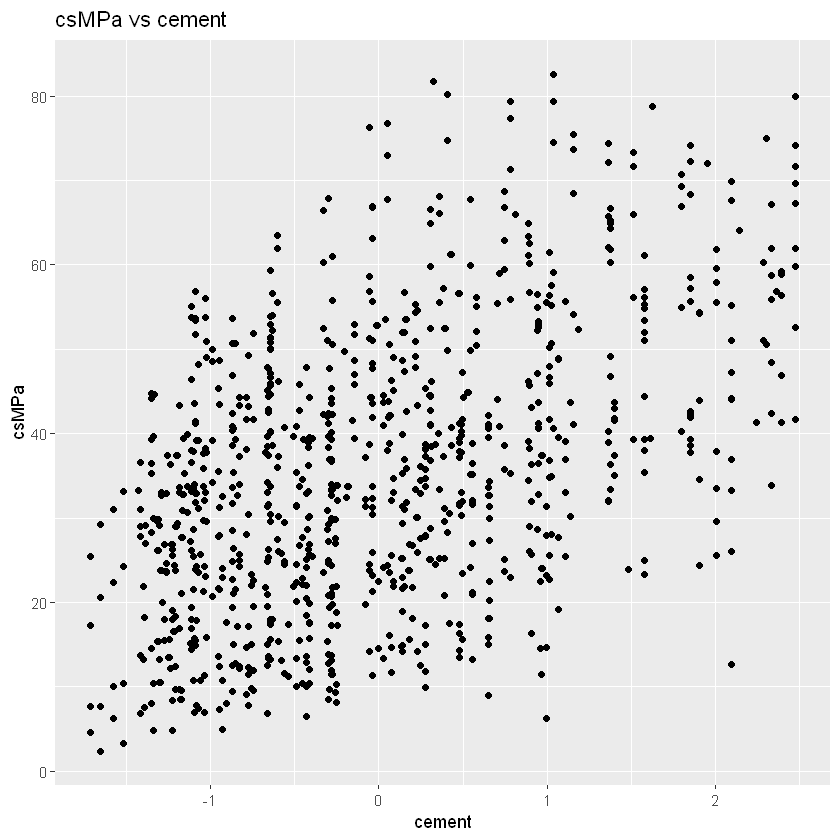

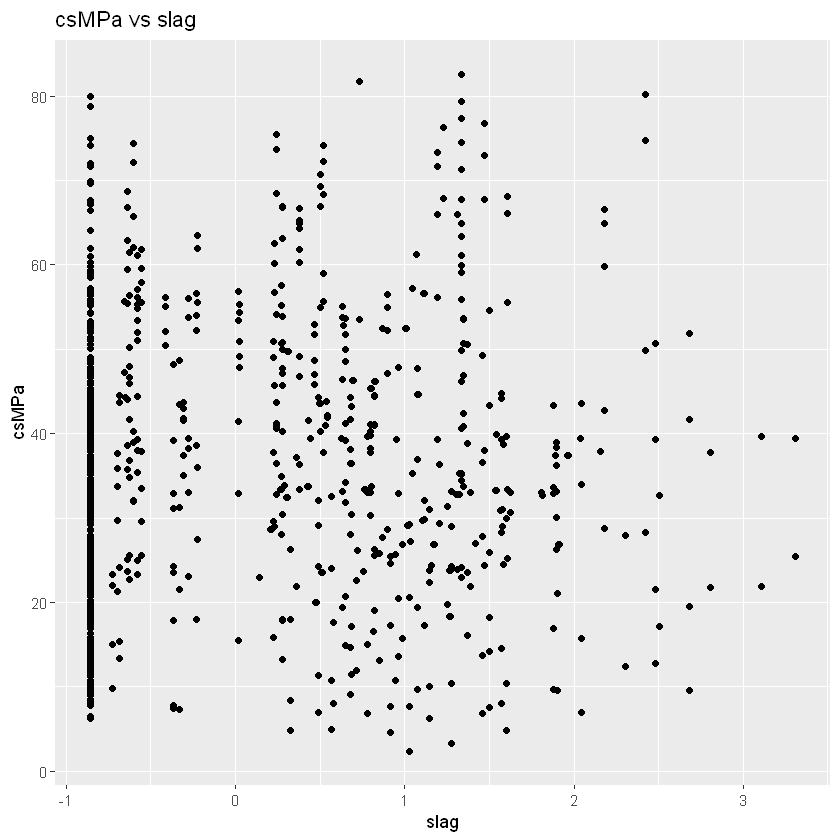

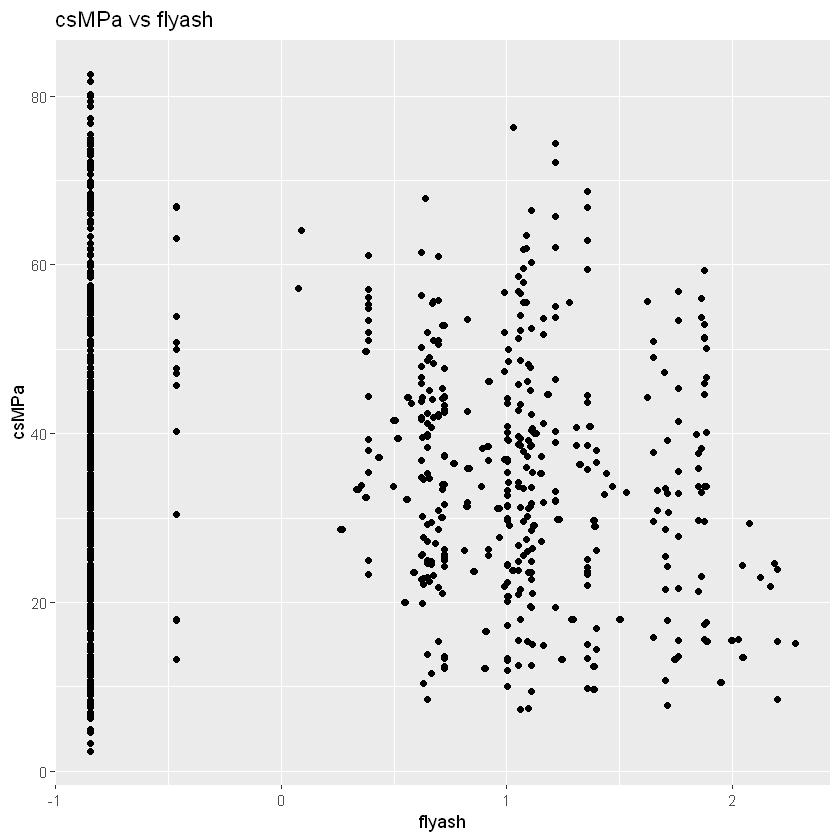

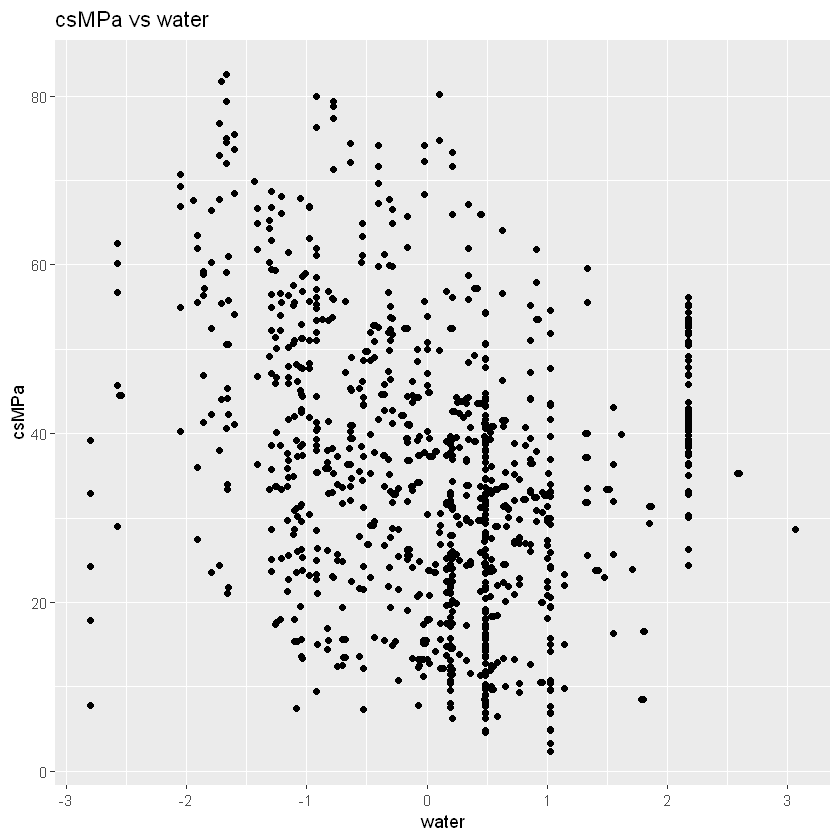

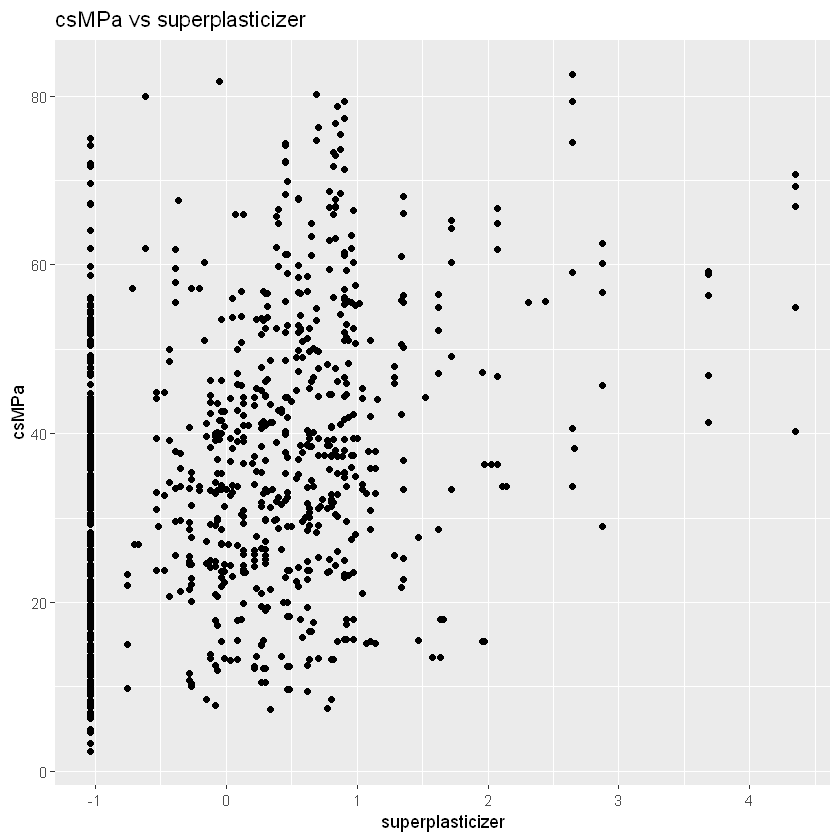

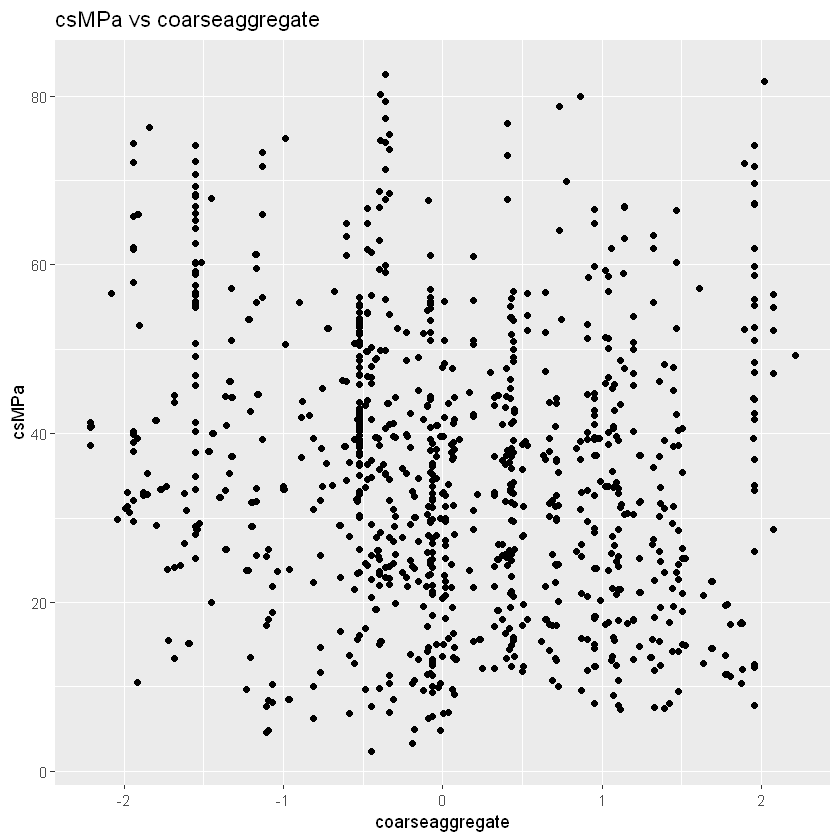

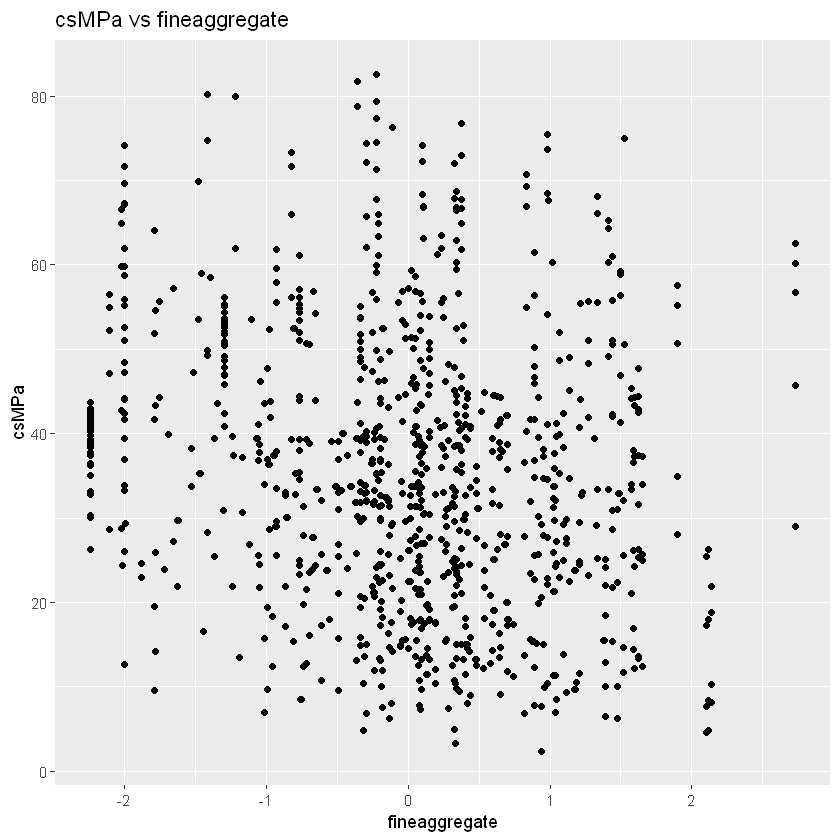

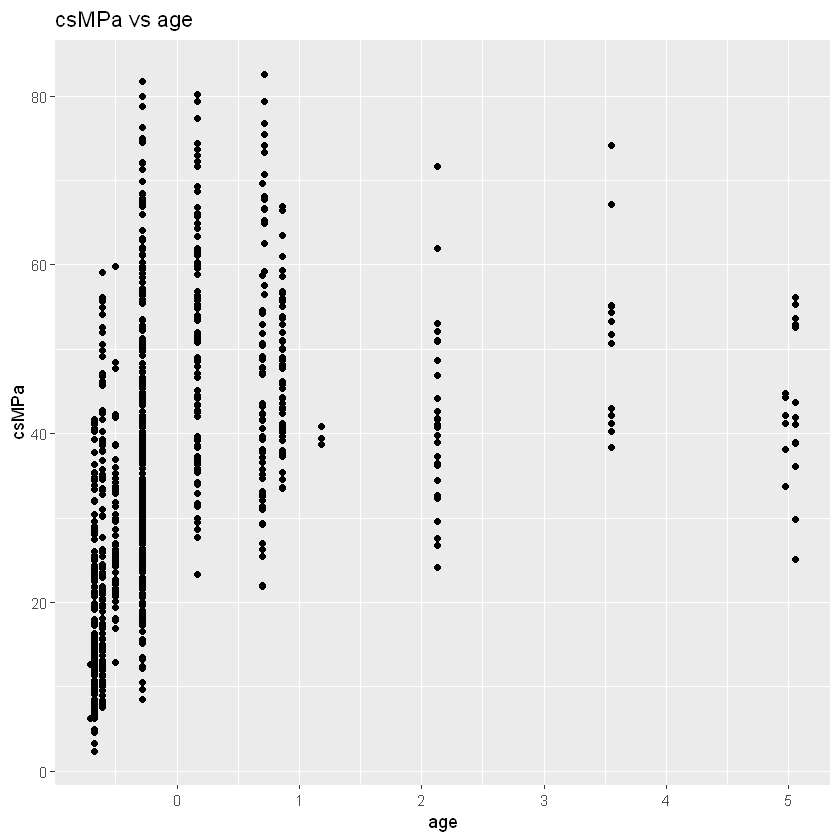

In [9]:
#* 1
ggplot(data,aes(data[,1],data[,9])) +
  geom_point() + xlab(names(data)[1]) + ylab(colnames(data)[9]) +
  labs(title = paste(names(data)[9],'vs',colnames(data)[1]))

#* 2
ggplot(data,aes(data[,2],data[,9])) +
  geom_point() + xlab(names(data)[2]) + ylab(colnames(data)[9]) +
  labs(title = paste(names(data)[9],'vs',colnames(data)[2]))

#* 3
ggplot(data,aes(data[,3],data[,9])) +
  geom_point() + xlab(names(data)[3]) + ylab(colnames(data)[9]) +
  labs(title = paste(names(data)[9],'vs',colnames(data)[3]))

#* 4
ggplot(data,aes(data[,4],data[,9])) +
  geom_point() + xlab(names(data)[4]) + ylab(colnames(data)[9]) +
  labs(title = paste(names(data)[9],'vs',colnames(data)[4]))

#* 5
ggplot(data,aes(data[,5],data[,9])) +
  geom_point() + xlab(names(data)[5]) + ylab(colnames(data)[9]) +
  labs(title = paste(names(data)[9],'vs',colnames(data)[5]))

#* 6
ggplot(data,aes(data[,6],data[,9])) +
  geom_point() + xlab(names(data)[6]) + ylab(colnames(data)[9]) +
  labs(title = paste(names(data)[9],'vs',colnames(data)[6]))

#* 7
ggplot(data,aes(data[,7],data[,9])) +
  geom_point() + xlab(names(data)[7]) + ylab(colnames(data)[9]) +
  labs(title = paste(names(data)[9],'vs',colnames(data)[7]))

#* 8
ggplot(data,aes(data[,8],data[,9])) +
  geom_point() + xlab(names(data)[8]) + ylab(colnames(data)[9]) +
  labs(title = paste(names(data)[9],'vs',colnames(data)[8]))


### Modelamiento


In [14]:
fit = lm(csMPa^0.7 ~ . - coarseaggregate  + I(fineaggregate^2) +
           I(superplasticizer^2) + I(age^2) + I(cement*water) +I(cement^2) , data = data)
summary(fit)


Call:
lm(formula = csMPa^0.7 ~ . - coarseaggregate + I(fineaggregate^2) + 
    I(superplasticizer^2) + I(age^2) + I(cement * water) + I(cement^2), 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4329 -1.1368  0.0259  1.2400  6.5620 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           13.44080    0.10059 133.619  < 2e-16 ***
cement                 2.79476    0.11291  24.753  < 2e-16 ***
slag                   1.68364    0.10592  15.895  < 2e-16 ***
flyash                 0.71796    0.12234   5.868 5.95e-09 ***
water                 -0.90440    0.09439  -9.581  < 2e-16 ***
superplasticizer       0.78867    0.12330   6.396 2.42e-10 ***
fineaggregate         -0.05792    0.09362  -0.619 0.536279    
age                    4.39197    0.12490  35.165  < 2e-16 ***
I(fineaggregate^2)    -0.18912    0.04944  -3.825 0.000138 ***
I(superplasticizer^2) -0.38717    0.04775  -8.108 1.47e-15 ***
I(age^2)              -0.79143  

#### Resultados

Los efectos cuadráticos incluidos en el modelo implican la presencia de puntos de inflexión en el comportamiento de la resistencia del concreto con respecto a las variables explicativas. Por lo tanto, si se quisiera máximizar o minimizar la resistencia, sería necesario tener en cuenta cuáles son esos puntos críticos.

Nótese que las variables explicativas para este modelo están estandarizadas por lo que si se quiere dar una interpretación en términos de las variables originales, sería necesario recalcular la ecuación estimada.

Como se puede evidenciar en los gráficos de las superficies obtenidas de la variable respuesta frente a cada par de variables que tienen terminos de segundo grado, se tienen extremos locales para el valor de la resistencia. 

Así, por ejemplo,si se desea obtener una resitencia máxima del concreto se recomienda  tener una edad cercana a 2 y un cemento de 1 sd.